In [329]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd


Step 1: read in data from the .xls file

In [330]:
DATA_FILE = '../data/fire_theft.xls'

book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

Step 2: create placeholders for input X (number of fire) and label Y (number of theft)

In [331]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

Step 3: create weight and bias, initialized to 0

In [332]:
w = tf.Variable(0.0, name='w')
b = tf.Variable(0.0, name='b')

Step 4: build model to predict Y

In [333]:
Y_predicted = w * X + b

Step 5: use the square error as the loss function

In [334]:
loss = tf.square(Y - Y_predicted)

Step 5a: implement Huber loss function from lecture and try it out

In [335]:
def huber_loss(labels, predictions, delta=1.0):
    diff = tf.abs(predictions - labels)
    cond = tf.less(diff, delta)
    res_sml = 0.5 * tf.square(diff) 
    res_lrg = delta * diff - 0.5 * tf.square(delta)
    return tf.where(cond, res_sml, res_lrg)

In [336]:
loss = huber_loss(Y, Y_predicted)
#loss = utils.huber_loss(Y, Y_predicted)

Step 6: using gradient descent with learning rate of 0.01 to minimize loss

In [337]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.02).minimize(loss)

In [338]:
sess = tf.Session() # prefer with tf.Session() as sess: in your code

Step 7: initialize the necessary variables, in this case, w and b

In [339]:
sess.run(tf.global_variables_initializer())
writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)

Step 8: train the model

In [340]:
for i in range(150): # train the model 150 epochs
    total_loss = 0
    for x, y in data:
        # Session runs train_op and fetch values of loss
        _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
        total_loss += l
    print('Epoch {0}: {1}'.format(i, total_loss/float(n_samples)))

# close the writer when you're done using it
writer.close()

Epoch 0: 19.912709803808305
Epoch 1: 17.60132904741026
Epoch 2: 17.418483984789678
Epoch 3: 17.42033826737177
Epoch 4: 17.107126844514692
Epoch 5: 17.130360099531355
Epoch 6: 16.87036039972944
Epoch 7: 16.869343980792024
Epoch 8: 16.49728204394203
Epoch 9: 16.042431409869874
Epoch 10: 16.14836044412195
Epoch 11: 15.845705719221206
Epoch 12: 16.14649705952477
Epoch 13: 15.658846432354213
Epoch 14: 15.582563824951649
Epoch 15: 15.492308557388329
Epoch 16: 15.412787994813351
Epoch 17: 15.329379122172083
Epoch 18: 15.245205446390347
Epoch 19: 15.161197135324723
Epoch 20: 15.077233184656333
Epoch 21: 14.993281070003702
Epoch 22: 14.913500332528548
Epoch 23: 14.848449217953853
Epoch 24: 14.784639825246163
Epoch 25: 14.727556729955333
Epoch 26: 14.671750120430564
Epoch 27: 14.620467117599523
Epoch 28: 14.571350350665549
Epoch 29: 14.52113401442988
Epoch 30: 14.468242385302714
Epoch 31: 14.421892493963242
Epoch 32: 14.37290645423872
Epoch 33: 14.336734500769083
Epoch 34: 14.293072095196251
Epo

Step 9: output the values of w and b

In [341]:
w, b = sess.run([w, b])

Step 10: plot the results

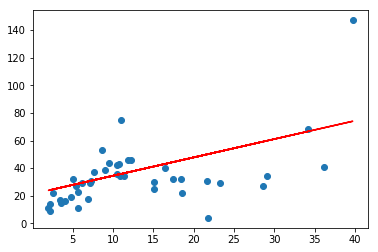

In [342]:
X, Y = data[:, 0], data[:, 1]
plt.scatter(X, Y, label="Real data")
plt.plot(X, w * X + b, label="Predicted data", color='r')
plt.show()